## Support Vector Machines :-
**what we are trying to do is that; we have to insert the hyperplane between the clusters**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# using builtin sklearn dataset of Breast cancer
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
data = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])

In [5]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
# checking the targets
# we can actually scale the data so that it may compute well
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data)
data = scaler.transform(data)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, cancer['target'], test_size=0.33, random_state=42)

In [22]:
from sklearn.svm import SVC
model = SVC()

In [23]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

D:\Study\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

[[ 59   8]
 [  0 121]]


0.9574468085106383


In [27]:
# still we want to play with the parameters
param = {
    'C':[1,0.1,0.01,10,0.001], 'gamma':[1, 0.1,0.01,0.001,10]
}
from sklearn.model_selection import GridSearchCV

In [29]:
grid = GridSearchCV(SVC(), param, refit=True, verbose=3)
grid.fit(X_train,y_train)

D:\Study\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.969, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.976, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.960, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.961, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.961, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.952, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 0.1, 0.01, 10, 0.001],
                         'gamma': [1, 0.1, 0.01, 0.001, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [30]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [31]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
grid_pred = grid.predict(X_test)

In [33]:
print(accuracy_score(grid_pred, y_test))

0.9840425531914894


### Lets make our own data and predict

In [36]:
from numpy import random
def cluster(N,k):
    numPoints = N/k
    X = []
    y = []
    for i in range(k):
        fet1_centroid = random.uniform(1000,100000)
        fet2_centroid = random.uniform(20,70)
        for j in range(int(numPoints)):
            X.append([random.normal(fet1_centroid,500),random.normal(fet2_centroid,3)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [56]:
X, y = cluster(1000, 5)

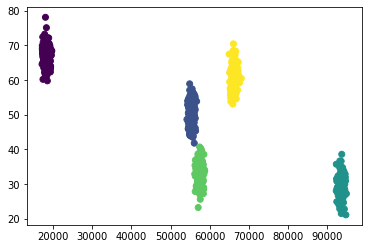

In [57]:
# lets visualise the data:
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

In [58]:
from sklearn.svm import SVC
model2 = SVC()

In [59]:
# scalin (prepprocessing --> MiinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,1))
Scaler.fit(X)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.model_selection import GridSearchCV
grid2 = GridSearchCV(SVC(), param, refit=True, verbose=3)

In [61]:
grid2.fit(X_train, y_train)

D:\Study\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.254, total=   0.1s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.262, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.268, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.481, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.509, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.521, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ...........

[CV] .................... C=0.001, gamma=1, score=0.209, total=   0.0s
[CV] C=0.001, gamma=1 ................................................
[CV] .................... C=0.001, gamma=1, score=0.210, total=   0.0s
[CV] C=0.001, gamma=1 ................................................
[CV] .................... C=0.001, gamma=1, score=0.208, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] .................. C=0.001, gamma=0.1, score=0.209, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] .................. C=0.001, gamma=0.1, score=0.210, total=   0.0s
[CV] C=0.001, gamma=0.1 ..............................................
[CV] .................. C=0.001, gamma=0.1, score=0.208, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ................. C=0.001, gamma=0.01, score=0.209, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 0.1, 0.01, 10, 0.001],
                         'gamma': [1, 0.1, 0.01, 0.001, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [62]:
grid2.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
predictions = grid2.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(accuracy_score(y_test,predictions))

[[33  0  0  0  0]
 [ 0 48  0  0  0]
 [ 2  0 35  0  0]
 [ 0  1  0 37  0]
 [ 5  0  0  0 39]]


0.96


* lets analize the iris dataset ehich is inbuild in sklearn

In [65]:
from sklearn.datasets import load_iris

In [66]:
iris = load_iris()

In [67]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [69]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [72]:
# perprocessing :
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1))
scaling.fit(df)
df = scaling.transform(df)

# splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, iris['target'], test_size=0.2, random_state=42)

In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters ={
    'C':[1,0.1,0.01,0.001,10], 'gamma':[1,10,100,0.1,0.01,0.001]
}
grid3 = GridSearchCV(SVC(), parameters, refit=True, verbose=3)

In [74]:
grid3.fit(X_train, y_train)

D:\Study\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.951, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.925, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.974, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.976, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.875, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.974, total=   0.0s
[CV] C=1, gamma=100 ..................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 0.1, 0.01, 0.001, 10],
                         'gamma': [1, 10, 100, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [75]:
grid3.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
grid_pred = grid3.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,grid_pred))

1.0


In [78]:
# perfect predictions